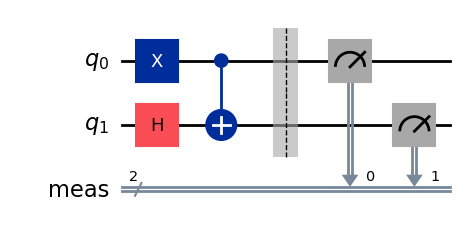

In [1]:
from qiskit import QuantumCircuit, QuantumRegister

qubits=QuantumRegister(2,name='q')
q0, q1 = qubits
qc = QuantumCircuit(qubits)
qc.x(q0)
qc.h(q1)
qc.cx(q0, q1)
qc.measure_all()

qc.draw('mpl', filename='quantum_circuit.png')